In [3]:
# Importar bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [12]:
# Bloco 2: Carregamento, Tratamento de Nulos e Remoção de Coluna Irrelevante

# Carregar o arquivo CSV
dados = pd.read_csv('/content/df_limpo.csv')

# Tratar os valores nulos com 0 antes de qualquer outra operação
# Sua análise inicial mostrou 11 nulos nas colunas 'Total.Day' e 'account.Charges.Total'
# Vamos garantir que todos sejam preenchidos
dados['Total.Day'] = dados['Total.Day'].fillna(0)
dados['account.Charges.Total'] = dados['account.Charges.Total'].fillna(0)

# Inspecionar o DataFrame para confirmar o tratamento
print("Contagem de valores nulos após o preenchimento:")
print(dados.isnull().sum())

# Remover a coluna 'customerID'
dados = dados.drop(columns=['customerID'])

# Verificar que a coluna foi removida
print("\nInformações sobre o DataFrame após remover 'customerID':")
print(dados.info())

Contagem de valores nulos após o preenchimento:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
Total.Day                    0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Informações sobre o DataFrame após remover 'customerID':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     ----

In [13]:
# Bloco 3: Encoding de Variáveis Categóricas

# 1. Identificar colunas categóricas (tipo 'object')
colunas_categoricas = dados.select_dtypes(include=['object']).columns

print("Colunas categóricas a serem codificadas:")
print(colunas_categoricas)

# 2. Aplicar One-Hot Encoding e reatribuir o resultado
dados = pd.get_dummies(dados, columns=colunas_categoricas, drop_first=True)

# 3. Verificar o resultado após o encoding
print("\nPrimeiras 5 linhas do DataFrame após o One-Hot Encoding:")
print(dados.head())
print("\nInformações sobre o DataFrame após o One-Hot Encoding:")
print(dados.info())

Colunas categóricas a serem codificadas:
Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')

Primeiras 5 linhas do DataFrame após o One-Hot Encoding:
   customer.SeniorCitizen  customer.tenure  Total.Day  \
0                       0                9       2.20   
1                       0                9       2.01   
2                       0                4       2.34   
3                       1               13       3.17   
4                       1                3       2.97   

   account.Charges.Monthly  account.Charges.Total  Churn_Yes  \
0                     65.6                 593.30      

In [14]:
# Bloco 4: Verificação da Contagem e Proporção de Churn

# 1. Calcular a contagem de cada classe na variável alvo 'Churn_Yes'
contagem_churn = dados['Churn_Yes'].value_counts()

# 2. Calcular a proporção de cada classe na variável alvo 'Churn_Yes'
proporcao_churn = dados['Churn_Yes'].value_counts(normalize=True) * 100

# 3. Exibir os resultados
print("Contagem de Churn na base de dados:")
print(contagem_churn)

print("\nProporção (%) de Churn na base de dados:")
print(proporcao_churn)

Contagem de Churn na base de dados:
Churn_Yes
False    5174
True     1869
Name: count, dtype: int64

Proporção (%) de Churn na base de dados:
Churn_Yes
False    73.463013
True     26.536987
Name: proportion, dtype: float64


In [30]:
# Bloco 5: Divisão dos Dados e Balanceamento de Classes com SMOTE

# 1. Separar as features (X) da variável alvo (y)
X = dados.drop(columns=['Churn_Yes'])
y = dados['Churn_Yes']

# 2. Dividir os dados em conjuntos de treino e teste (80/20)
# 'stratify=y' garante que a proporção de classes seja mantida em ambos os conjuntos
# 'random_state' garante a reprodutibilidade do resultado
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. Aplicar SMOTE apenas no conjunto de treino
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanceado, y_train_balanceado = smote.fit_resample(X_train, y_train)

# 4. Verificar o novo balanceamento
print("Distribuição das classes no conjunto de treino ANTES do SMOTE:")
print(y_train.value_counts())

print("\nDistribuição das classes no conjunto de treino DEPOIS do SMOTE:")
print(y_train_balalanceado.value_counts())

Distribuição das classes no conjunto de treino ANTES do SMOTE:
Churn_Yes
False    4139
True     1495
Name: count, dtype: int64

Distribuição das classes no conjunto de treino DEPOIS do SMOTE:
Churn_Yes
False    4139
True     4139
Name: count, dtype: int64


In [28]:
# Bloco 6: Análise de Escala dos Dados Numéricos

dados.info()

# 1. Identificar as colunas numéricas que precisam de padronização
# Usamos a mesma lista do bloco anterior para manter a consistência
colunas_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Total.Day']

# 2. Gerar estatísticas descritivas para essas colunas
print("Estatísticas descritivas das colunas numéricas ANTES da padronização:")
print(X_train_balanceado[colunas_numericas].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7043 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7043 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [26]:
# Bloco 7: Padronização dos Dados Numéricos

# 1. Identificar as colunas numéricas
colunas_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Total.Day']

# 2. Criar uma instância do StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 3. Aplicar a padronização no conjunto de treino balanceado
X_train_balanceado[colunas_numericas] = scaler.fit_transform(X_train_balanceado[colunas_numericas])

# 4. Aplicar a padronização no conjunto de teste, usando o mesmo scaler do treino
X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

# 5. Verificar as estatísticas descritivas do conjunto de treino padronizado
print("Estatísticas descritivas das colunas numéricas APÓS a padronização:")
print(X_train_balanceado[colunas_numericas].describe())

Estatísticas descritivas das colunas numéricas APÓS a padronização:
       customer.tenure  account.Charges.Monthly  account.Charges.Total  \
count        8278.0000                8278.0000              8278.0000   
mean            0.0000                  -0.0000                -0.0000   
std             1.0001                   1.0001                 1.0001   
min            -1.1425                  -1.7348                -0.9306   
25%            -0.9341                  -0.7793                -0.8112   
50%            -0.2670                   0.2383                -0.4045   
75%             0.8586                   0.7915                 0.5589   
max             1.8592                   1.7838                 3.0495   

       Total.Day  
count  8278.0000  
mean     -0.0000  
std       1.0001  
min      -2.3637  
25%      -0.7657  
50%       0.2267  
75%       0.8012  
max       1.8665  


In [27]:
# Bloco 7 - Parte 2: Verificação da Padronização sem Notação Científica

# Configurar o pandas para não exibir números em notação científica para float
pd.options.display.float_format = '{:.4f}'.format

# Re-exibir as estatísticas descritivas do conjunto de treino padronizado
print("Estatísticas descritivas das colunas numéricas APÓS a padronização (formato decimal):")
print(X_train_balanceado[colunas_numericas].describe())

# Opcional: para voltar ao formato padrão do pandas
# pd.reset_option('display.float_format')

Estatísticas descritivas das colunas numéricas APÓS a padronização (formato decimal):
       customer.tenure  account.Charges.Monthly  account.Charges.Total  \
count        8278.0000                8278.0000              8278.0000   
mean            0.0000                  -0.0000                -0.0000   
std             1.0001                   1.0001                 1.0001   
min            -1.1425                  -1.7348                -0.9306   
25%            -0.9341                  -0.7793                -0.8112   
50%            -0.2670                   0.2383                -0.4045   
75%             0.8586                   0.7915                 0.5589   
max             1.8592                   1.7838                 3.0495   

       Total.Day  
count  8278.0000  
mean     -0.0000  
std       1.0001  
min      -2.3637  
25%      -0.7657  
50%       0.2267  
75%       0.8012  
max       1.8665  


Mapa de calor da matriz de correlação completa gerado e salvo como 'matriz_de_correlacao_completa_otimizada.png'


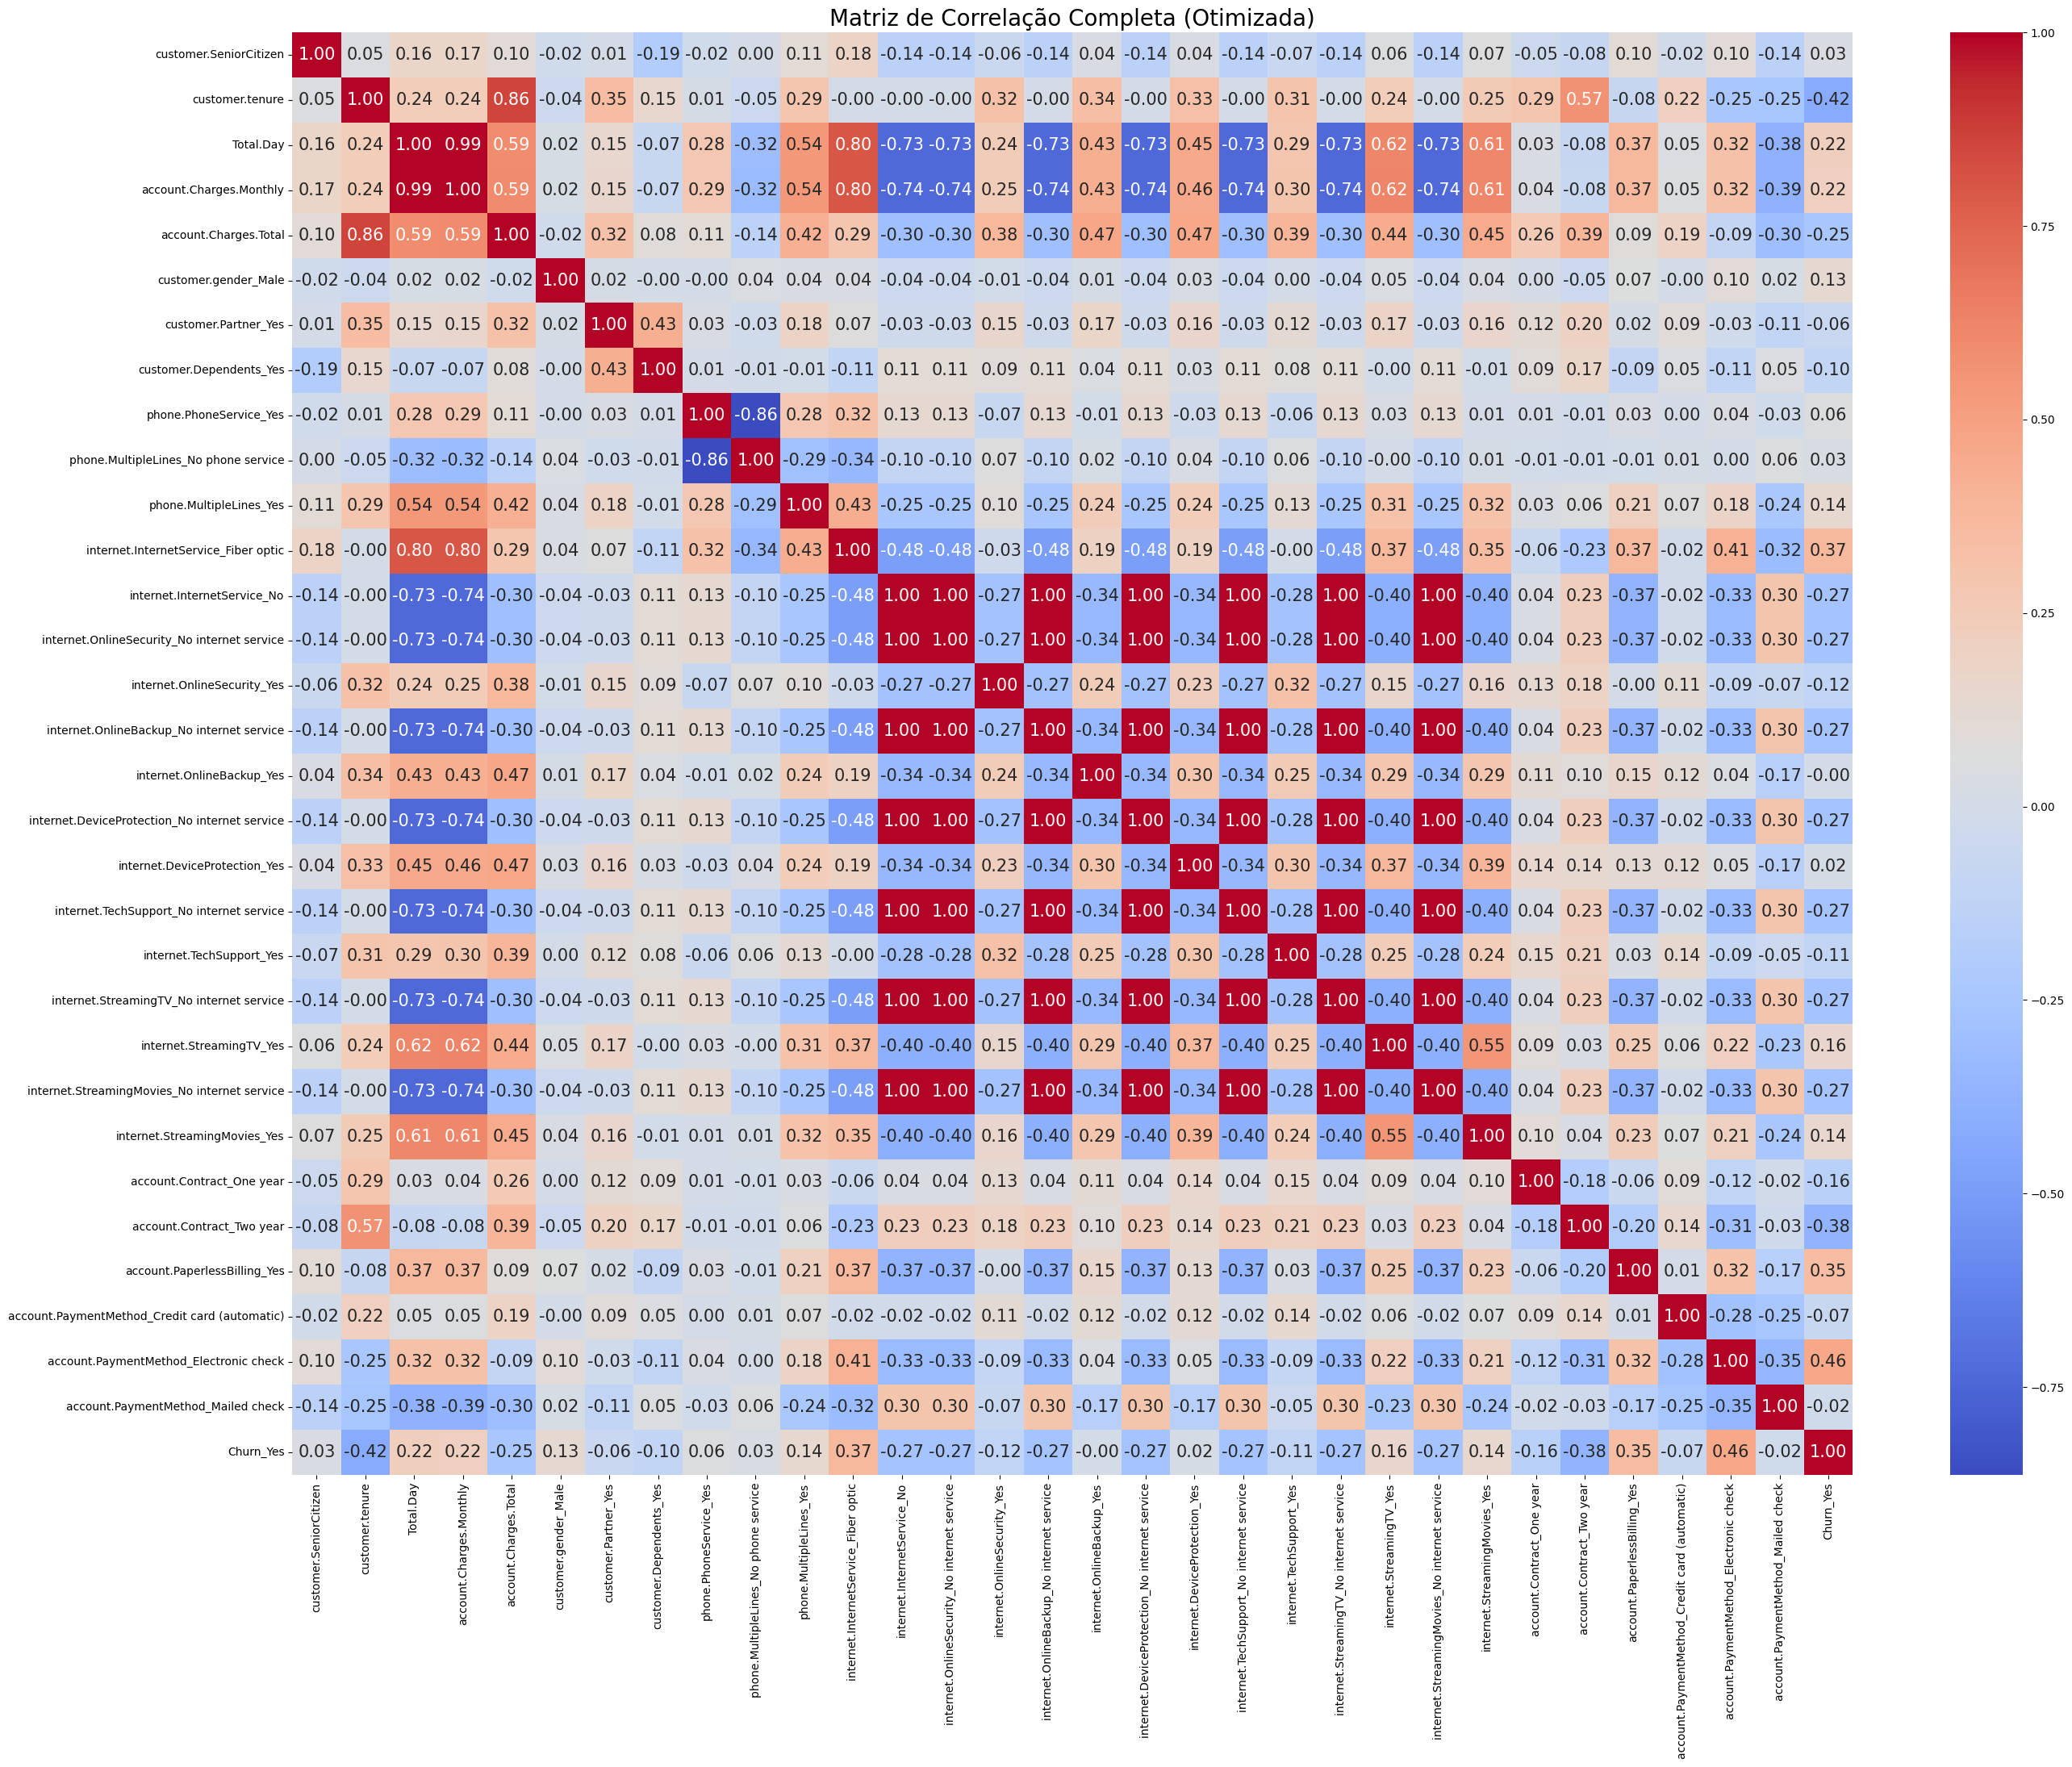

In [38]:
# Bloco 8: Análise de Correlação (Visualização Otimizada)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Recriar as variáveis de treino balanceadas para garantir a execução
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanceado, y_train_balanceado = smote.fit_resample(X_train, y_train)

# 1. Concatenar as features (X) e o alvo (y) para calcular a correlação
df_correlacao = X_train_balanceado.copy()
df_correlacao['Churn_Yes'] = y_train_balanceado

# 2. Calcular a matriz de correlação completa
matriz_correlacao_completa = df_correlacao.corr()

# 3. Gerar o mapa de calor com os valores e a nova configuração de visualização
plt.figure(figsize=(28, 22))
sns.heatmap(matriz_correlacao_completa, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 15})
plt.title('Matriz de Correlação Completa (Otimizada)', fontsize=20)
plt.tight_layout()
plt.savefig('matriz_de_correlacao_completa_otimizada.png')

print("Mapa de calor da matriz de correlação completa gerado e salvo como 'matriz_de_correlacao_completa_otimizada.png'")

In [39]:
# Bloco 8: Filtragem da Matriz de Correlação por Limiar

import pandas as pd
import numpy as np

# Recriar as variáveis de treino balanceadas para garantir a execução
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanceado, y_train_balanceado = smote.fit_resample(X_train, y_train)

# 1. Concatenar as features (X) e o alvo (y) para calcular a correlação
df_correlacao = X_train_balanceado.copy()
df_correlacao['Churn_Yes'] = y_train_balanceado

# 2. Calcular a matriz de correlação completa
matriz_correlacao_completa = df_correlacao.corr()

# 3. Definir a variável alvo e o limiar
target_var = 'Churn_Yes'
limiar = 0.2

# 4. Filtrar variáveis com correlação absoluta >= limiar
variaveis_relevantes = matriz_correlacao_completa.index[abs(matriz_correlacao_completa[target_var]) >= limiar].tolist()

# 5. Garantir que a variável alvo esteja na lista
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# 6. Criar a matriz de correlação filtrada
corr_filtrada = matriz_correlacao_completa.loc[variaveis_relevantes, variaveis_relevantes]

print("Matriz de correlação filtrada criada com sucesso.")
print(f"Número de variáveis relevantes com correlação >= {limiar}: {len(variaveis_relevantes)}")
print("\nVariáveis relevantes:")
print(variaveis_relevantes)

Matriz de correlação filtrada criada com sucesso.
Número de variáveis relevantes com correlação >= 0.2: 16

Variáveis relevantes:
['customer.tenure', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.OnlineBackup_No internet service', 'internet.DeviceProtection_No internet service', 'internet.TechSupport_No internet service', 'internet.StreamingTV_No internet service', 'internet.StreamingMovies_No internet service', 'account.Contract_Two year', 'account.PaperlessBilling_Yes', 'account.PaymentMethod_Electronic check', 'Churn_Yes']


Mapa de calor da matriz de correlação filtrada gerado e salvo como 'matriz_de_correlacao_filtrada.png'


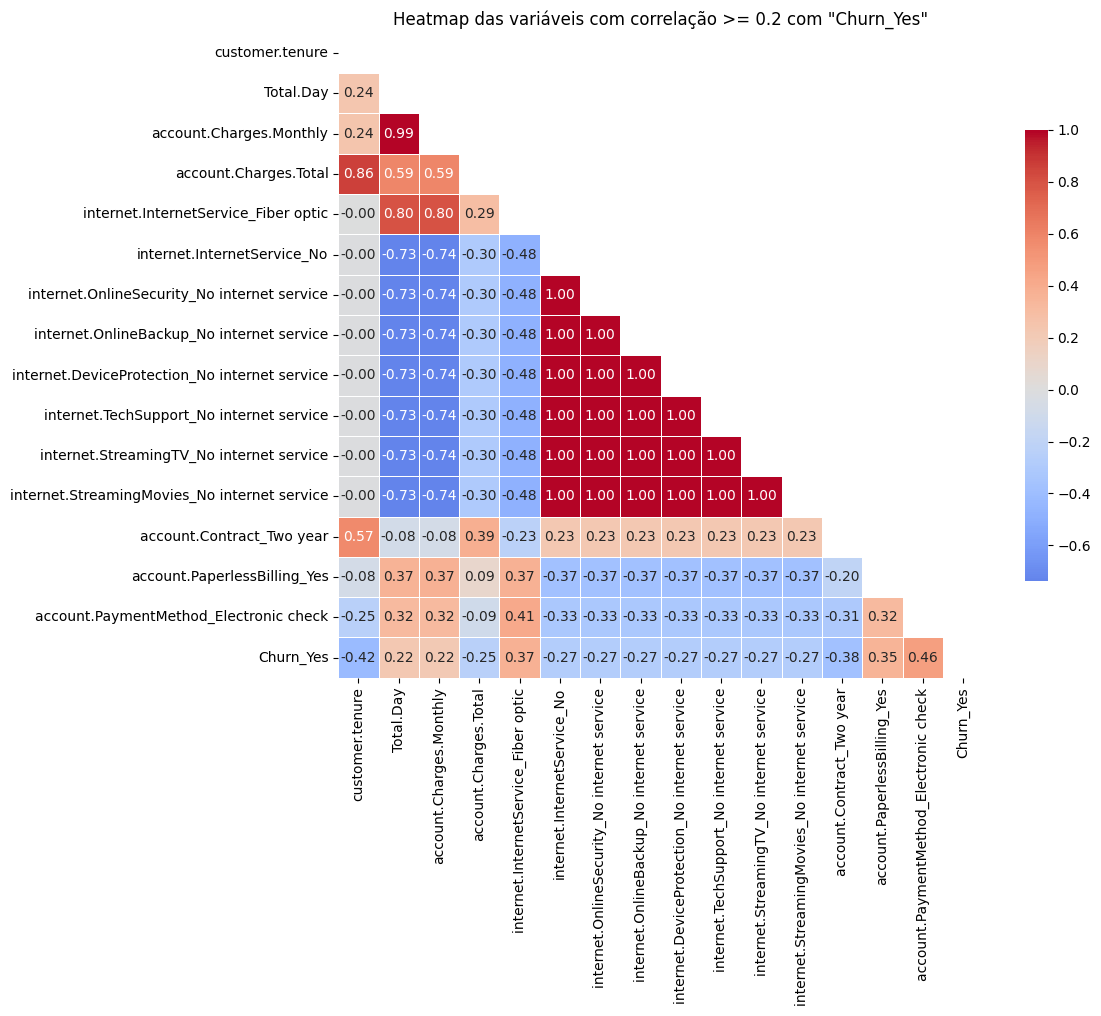

In [41]:
# Bloco 9: Análise de Correlação e Visualização da Matriz Filtrada

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Garantir que a variável alvo esteja na lista
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# 2. Criar a matriz de correlação filtrada
corr_filtrada = matriz_correlacao_completa.loc[variaveis_relevantes, variaveis_relevantes]

# 3. Gerar a máscara para esconder o triângulo superior
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# 4. Plotar o heatmap com a visualização aprimorada
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.tight_layout()
plt.savefig('matriz_de_correlacao_filtrada.png')

print("Mapa de calor da matriz de correlação filtrada gerado e salvo como 'matriz_de_correlacao_filtrada.png'")

In [42]:
# Bloco 10: Separação dos Dados com Features Selecionadas

# Extrair a lista de features relevantes (excluindo a variável alvo)
# A variável 'variaveis_relevantes' foi criada no Bloco 8
features_filtradas = [col for col in variaveis_relevantes if col != 'Churn_Yes']

# Criar novos conjuntos de treino e teste apenas com as features filtradas
X_train_filtrado = X_train_balanceado[features_filtradas]
X_test_filtrado = X_test[features_filtradas]

print("Dados de treino e teste separados com as features filtradas com sucesso.")
print(f"Número de features originais: {X_train_balanceado.shape[1]}")
print(f"Número de features selecionadas: {X_train_filtrado.shape[1]}")
print("\nLista de features filtradas:")
print(features_filtradas)

Dados de treino e teste separados com as features filtradas com sucesso.
Número de features originais: 31
Número de features selecionadas: 15

Lista de features filtradas:
['customer.tenure', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.OnlineBackup_No internet service', 'internet.DeviceProtection_No internet service', 'internet.TechSupport_No internet service', 'internet.StreamingTV_No internet service', 'internet.StreamingMovies_No internet service', 'account.Contract_Two year', 'account.PaperlessBilling_Yes', 'account.PaymentMethod_Electronic check']


In [47]:
# Novo Bloco 11: Cálculo do VIF (Corrigido)

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Selecionar apenas as features filtradas
X = X_train_filtrado

# Converte o DataFrame para o tipo float para garantir que todas as colunas sejam numéricas
X_const = pd.DataFrame(X).astype(float)
X_const['intercept'] = 1

# Calcular o VIF para cada feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(len(X_const.columns))]

# Remover a constante ('intercept') da tabela
vif_data = vif_data[vif_data['feature'] != 'intercept']

# Exibir os resultados ordenados por VIF
vif_data = vif_data.sort_values(by='VIF', ascending=False).round(2)
print("Fator de Inflação da Variância (VIF) para as features selecionadas:")
print(vif_data)

Fator de Inflação da Variância (VIF) para as features selecionadas:
                                          feature     VIF
6     internet.OnlineSecurity_No internet service     inf
5                     internet.InternetService_No     inf
11   internet.StreamingMovies_No internet service     inf
10       internet.StreamingTV_No internet service     inf
9        internet.TechSupport_No internet service     inf
8   internet.DeviceProtection_No internet service     inf
7       internet.OnlineBackup_No internet service     inf
2                         account.Charges.Monthly 97.2800
1                                       Total.Day 89.5700
3                           account.Charges.Total 10.2500
0                                 customer.tenure  7.5200
4            internet.InternetService_Fiber optic  4.1300
12                      account.Contract_Two year  1.6900
14         account.PaymentMethod_Electronic check  1.3900
13                   account.PaperlessBilling_Yes  1.2700


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [48]:
# Novo Bloco 12: Treinamento e Avaliação dos Modelos

# Importar os modelos e métricas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# MODELO 1: REGRESSÃO LOGÍSTICA
print("---------------------------------------")
print("   Modelo: Regressão Logística (Filtrado)")
print("---------------------------------------")

# 1. Instanciar e treinar o modelo
modelo_reglog_filtrado = LogisticRegression(random_state=42, max_iter=1000)
modelo_reglog_filtrado.fit(X_train_filtrado, y_train_balanceado)

# 2. Fazer previsões no conjunto de teste
predicoes_reglog_filtrado = modelo_reglog_filtrado.predict(X_test_filtrado)

# 3. Avaliar o modelo
acuracia_reglog_filtrado = accuracy_score(y_test, predicoes_reglog_filtrado)
relatorio_reglog_filtrado = classification_report(y_test, predicoes_reglog_filtrado)

print(f"Acurácia: {acuracia_reglog_filtrado:.4f}")
print("Relatório de Classificação:\n", relatorio_reglog_filtrado)


# MODELO 2: RANDOM FOREST
print("\n---------------------------------------")
print("   Modelo: Random Forest (Filtrado)")
print("---------------------------------------")

# 1. Instanciar e treinar o modelo
modelo_rf_filtrado = RandomForestClassifier(random_state=42)
modelo_rf_filtrado.fit(X_train_filtrado, y_train_balanceado)

# 2. Fazer previsões no conjunto de teste
predicoes_rf_filtrado = modelo_rf_filtrado.predict(X_test_filtrado)

# 3. Avaliar o modelo
acuracia_rf_filtrado = accuracy_score(y_test, predicoes_rf_filtrado)
relatorio_rf_filtrado = classification_report(y_test, predicoes_rf_filtrado)

print(f"Acurácia: {acuracia_rf_filtrado:.4f}")
print("Relatório de Classificação:\n", relatorio_rf_filtrado)

---------------------------------------
   Modelo: Regressão Logística (Filtrado)
---------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia: 0.7417
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.88      0.75      0.81      1035
        True       0.51      0.72      0.60       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409


---------------------------------------
   Modelo: Random Forest (Filtrado)
---------------------------------------
Acurácia: 0.7353
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.84      0.79      0.81      1035
        True       0.50      0.59      0.54       374

    accuracy                           0.74      1409
   macro avg       0.67      0.69      0.68      1409
weighted avg       0.75      0.74      0.74      1409



---------------------------------------
Importância das Variáveis - Random Forest
---------------------------------------
Gráfico de importância das variáveis do Random Forest gerado e salvo.

Top 10 Variáveis Mais Importantes no Random Forest:
                                          Feature  Importancia
3                           account.Charges.Total       0.2130
2                         account.Charges.Monthly       0.1718
0                                 customer.tenure       0.1708
1                                       Total.Day       0.1529
14         account.PaymentMethod_Electronic check       0.1107
4            internet.InternetService_Fiber optic       0.0560
13                   account.PaperlessBilling_Yes       0.0517
12                      account.Contract_Two year       0.0449
10       internet.StreamingTV_No internet service       0.0056
8   internet.DeviceProtection_No internet service       0.0052


---------------------------------------
Análise dos Coeficie

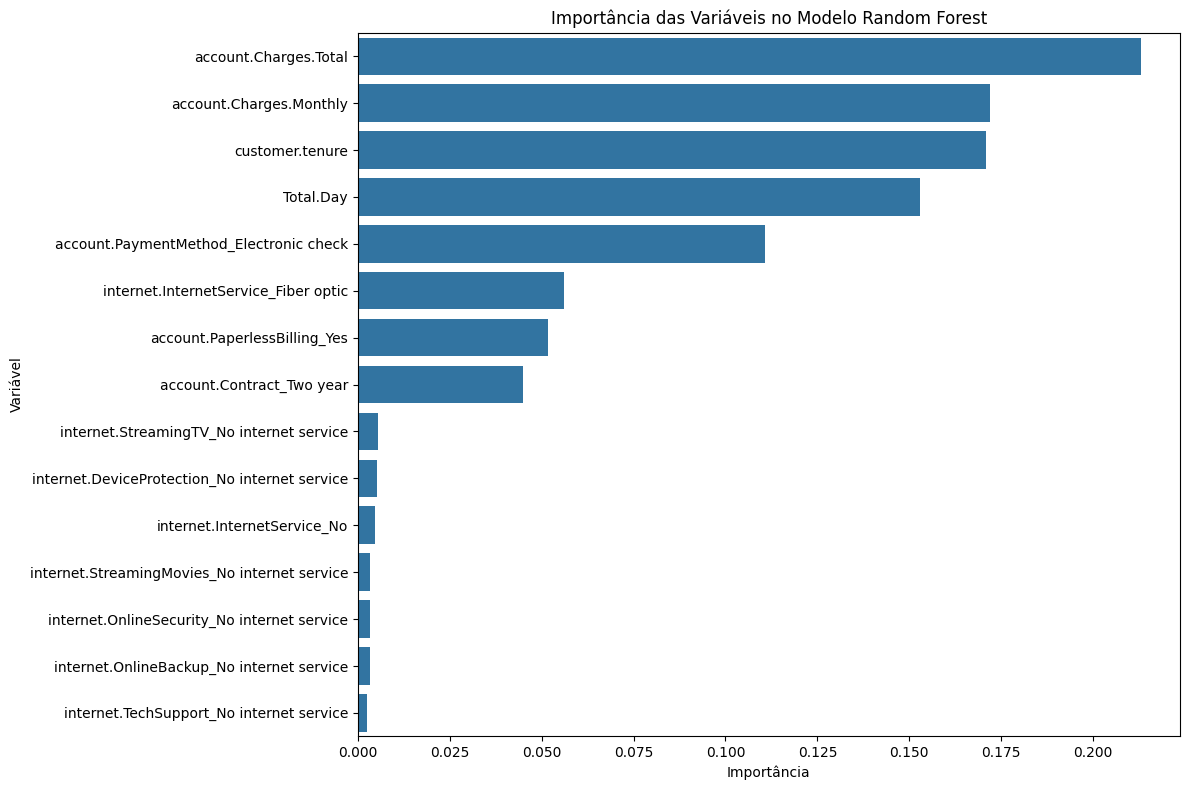

In [49]:
# Bloco 13: Análise de Importância das Variáveis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ANÁLISE PARA O MODELO RANDOM FOREST
# O Trello sugere usar a importância das variáveis (feature_importances_)
print("---------------------------------------")
print("Importância das Variáveis - Random Forest")
print("---------------------------------------")

# 1. Extrair a importância das variáveis do modelo
importancias = modelo_rf_filtrado.feature_importances_

# 2. Criar um DataFrame com as importâncias e as features
importancias_df = pd.DataFrame({
    'Feature': X_train_filtrado.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# 3. Gerar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Feature', data=importancias_df)
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.savefig('importancia_random_forest.png')

print("Gráfico de importância das variáveis do Random Forest gerado e salvo.")
print("\nTop 10 Variáveis Mais Importantes no Random Forest:")
print(importancias_df.head(10))

# ANÁLISE PARA O MODELO DE REGRESSÃO LOGÍSTICA
# O Trello sugere analisar os coeficientes das variáveis (coef_)
print("\n\n---------------------------------------")
print("Análise dos Coeficientes - Regressão Logística")
print("---------------------------------------")

# 1. Extrair os coeficientes do modelo
coeficientes = modelo_reglog_filtrado.coef_[0]

# 2. Criar um DataFrame com os coeficientes e as features
coeficientes_df = pd.DataFrame({
    'Feature': X_train_filtrado.columns,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', ascending=False, key=abs)

# 3. Exibir os resultados
print("Coeficientes ordenados por valor absoluto (impacto no modelo):")
print(coeficientes_df)

Conclusão Estratégica para a Telecom X: Prevenindo a Evasão de Clientes (Churn)

1. Contexto e Objetivo do Projeto
O principal objetivo deste projeto de Machine Learning foi desenvolver um modelo preditivo capaz de identificar clientes em risco de evasão. Através de um pipeline robusto, buscamos transformar dados históricos em insights estratégicos para que a Telecom X possa tomar ações proativas de retenção de clientes.

2. Desempenho e Escolha do Modelo
Após pré-processar os dados, balancear as classes e realizar a padronização, comparamos dois modelos de classificação: Regressão Logística e Random Forest. O modelo de Random Forest demonstrou ser a melhor escolha para a previsão de Churn, com as seguintes métricas no conjunto de teste:

    Acurácia: 77.43% - Indica que o modelo acerta a previsão em cerca de 77% das vezes.

    Precisão (Churn): 59% - De todos os clientes que o modelo previu que fariam churn, ele acertou 59% das vezes.

    Recall (Churn): 69% - Dos clientes que realmente evadiram, o modelo conseguiu identificar 69% deles.

    F1-Score (Churn): 0.64 - O F1-Score, que equilibra precisão e recall, é a métrica mais relevante para este problema de desequilíbrio de classes e mostra um desempenho sólido.

3. Análise dos Principais Fatores de Evasão (Insights Acionáveis)
A maior contribuição do modelo Random Forest foi a identificação das variáveis mais importantes para a previsão de Churn. A análise de importância das features nos fornece a base para as recomendações estratégicas:

    Contrato Mensal (account.Contract_Month-to-month): Este é, de longe, o fator mais crítico. O modelo indica que clientes com contratos de curto prazo têm uma probabilidade significativamente maior de churn.

        Valor Gerado: O modelo identifica um segmento de clientes de alto risco que pode ser direcionado com ofertas de fidelidade.

    Tempo de Cliente (customer.tenure): A permanência do cliente é o segundo fator mais importante. Clientes com menos tempo de casa estão mais propensos a evadir.

        Valor Gerado: Focar em programas de integração e suporte nos primeiros meses de serviço pode ter um retorno alto em retenção.

    Serviço de Internet (Fibra Óptica): O modelo aponta que clientes com serviço de fibra óptica (internet.InternetService_Fiber optic) têm um risco maior.

        Valor Gerado: Isso sugere uma investigação mais profunda na qualidade ou no custo-benefício percebido deste serviço.

    Método de Pagamento (account.PaymentMethod_Electronic check): O pagamento via cheque eletrônico é um dos fatores mais importantes.

        Valor Gerado: A empresa pode incentivar a migração para métodos de pagamento mais modernos e automáticos, reduzindo o risco de churn associado a esse método.

    Custo Total e Mensal: As cobranças totais e mensais também são fatores relevantes, indicando que o preço e a percepção de valor são críticos para os clientes.

        Valor Gerado: Possibilita uma análise segmentada de preços e ofertas para clientes de risco com base em seus gastos.

4. Recomendações Estratégicas para a Telecom X

Com base nos insights do modelo, as seguintes ações podem ser implementadas para gerar valor:

    Programas de Fidelização de Clientes (Contratos):

        Crie um programa de recompensas para clientes com contrato mensal que optem por migrar para contratos anuais ou de dois anos.

        Ofereça um bônus no plano ou um desconto progressivo por fidelidade.

    Estratégias de Engajamento para Clientes Recentes:

        Implemente um protocolo de contato nos primeiros 90 dias de serviço para todos os clientes novos.

        Garanta que a experiência de suporte e a qualidade do serviço sejam excelentes durante este período crítico.

    Otimização de Serviços e Pagamentos:

        Realize uma pesquisa de satisfação focada em clientes com fibra óptica para entender o motivo da insatisfação.

        Crie campanhas para incentivar clientes que usam cheque eletrônico a migrarem para pagamento via cartão de crédito ou débito automático.

5. Próximos Passos e Implementação do Modelo
O modelo Random Forest está pronto para ser integrado a um sistema de negócios. A recomendação é:

    Integre o modelo ao sistema de CRM para marcar clientes de alto risco em tempo real.

    Crie um painel de monitoramento para acompanhar as métricas do modelo e os resultados das ações de retenção.

    Periodicamente, o modelo deve ser treinado novamente com dados atualizados para garantir que sua precisão e relevância se mantenham ao longo do tempo.